Assignment 10
<p>Employ Naïve Bayes classification on the Iris dataset</p>

The question to answer, which technique that was used to explore the Iris dataset during the term produced the best results?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

In [6]:
irisData = load_iris()
# irisData
irisDataDF=pd.DataFrame(irisData.data, columns=irisData.feature_names)
irisDataDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
irisDataDF["Target"]=irisData.target
irisDataDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
### Quick reminder of what Iris data looks like.
print(irisDataDF.shape)
print(irisDataDF.info())
print(irisDataDF.describe())
print("\nAny Null?\n",irisDataDF.isnull().sum())


(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30000

<function matplotlib.pyplot.show(*args, **kw)>

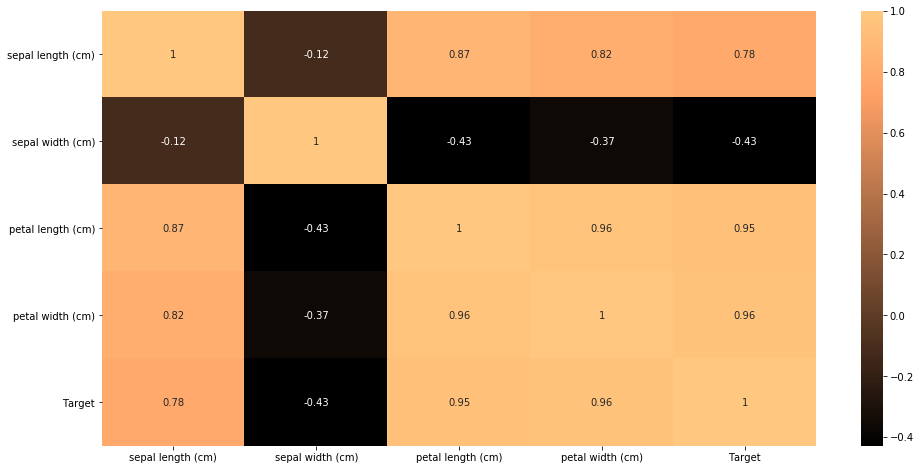

In [12]:
## Next heatmap shows the correlation between variables so
## while Naive Bayes will assume independence we have 
## dependence.
import seaborn as sns
fig,ax = plt.subplots(figsize=(16,8))
sns.heatmap(irisDataDF.corr(), annot=True, cmap='copper')
plt.show

In [15]:
naiveB=GaussianNB()
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
naiveB.fit(irisDataDF[features], irisDataDF['Target'])
predicted=naiveB.predict(irisDataDF[features])

In [19]:
# confusion_matrix(irisDataDF['Target'], predicted)
print("Naive Bayes Accuracy:",accuracy_score(irisDataDF['Target'], predicted))
pd.crosstab(irisDataDF['Target'], predicted)

Accuracy: 0.96


col_0,0,1,2
Target,,,
0,50,0,0
1,0,47,3
2,0,3,47


<b>Conclusion</b>
<p>From using Naive Bayes here on the Iris Dataset, it's accuracy is .96. That is better than the other methods observed this quarter; K-means Classification or Agglomerative Clustering (with both using PCA) models that got accuracies of .833 and .84 respectively and seen below (copied from HMW5)</p>

This would show that perhaps as mentioned in class that Naive Bayes has been overlooked (apparently due to heavy computational needs) and is one of the more successful ways to classify and predict potential solutions.